[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercises extend [Demo notebook 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/3_nb_predictive_analytics.ipynb). 
There, we largely focused on linear regression. Hence, in this notebook, we revisit some standard practices in regression analysis and - for the fun of it - consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey used other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics determine perceived quality (i.e, the target variable). Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look into the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patterns? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, you could also make use of some of the topics that we cover in [Demo notebook 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/4_nb_data_preparation.ipynb). 

In [286]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [274]:
# Load the data (either from disk or directly from the web)
data = pd.read_excel("wine.xls")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2023-04-07 00:00:00,0.7,0.00,2023-09-01 00:00:00,0.076,11,34.0,0.9978,1951-03-01 00:00:00,0.56,2023-04-09 00:00:00,5
1,2023-08-07 00:00:00,0.88,0.00,2023-06-02 00:00:00,0.098,25,67.0,0.9968,2023-02-03 00:00:00,0.68,2023-08-09 00:00:00,5
2,2023-08-07 00:00:00,0.76,0.04,2023-03-02 00:00:00,0.092,15,54.0,0.9970,2026-03-01 00:00:00,0.65,2023-08-09 00:00:00,5
3,2023-02-11 00:00:00,0.28,0.56,2023-09-01 00:00:00,0.075,17,60.0,0.9980,2016-03-01 00:00:00,0.58,2023-08-09 00:00:00,6
4,2023-04-07 00:00:00,0.7,0.00,2023-09-01 00:00:00,0.076,11,34.0,0.9978,1951-03-01 00:00:00,0.56,2023-04-09 00:00:00,5


In [275]:
def date_to_float(data, column: str):

    liste = []

    for row in data[column]:
        if isinstance(row, datetime.date) == True: 
            # save important numbers
            x = str(row).split("-")[1]
            y = str(row).split("-")[2].split(" ")[0]
            # del zeros
            x = x.strip('0') 
            y = y.strip('0')
            # append to list
            liste.append(f'{x}.{y}')
            
        elif type(row) == int:
            x = row
            y = 0
            liste.append(f'{x}.{y}')
            
        elif type(row) == str: 
            liste.append(float(row))
            
    # append to data frame
    data[column] = pd.to_numeric(liste)
    
    return data.head(5)

In [276]:
data.dtypes

fixed acidity            object
volatile acidity         object
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide    float64
density                 float64
pH                       object
sulphates                object
alcohol                  object
quality                   int64
dtype: object

In [277]:
date_to_float(data, "residual sugar")
date_to_float(data, "fixed acidity")
date_to_float(data, "pH")
date_to_float(data, "alcohol")
date_to_float(data, "sulphates")
date_to_float(data, "free sulfur dioxide")
date_to_float(data, "volatile acidity")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4.70,0.70,0.00,9.1,0.076,11.0,34.0,0.9978,3.1,0.56,4.9,5
1,8.70,0.88,0.00,6.2,0.098,25.0,67.0,0.9968,2.3,0.68,8.9,5
2,8.70,0.76,0.04,3.2,0.092,15.0,54.0,0.9970,3.1,0.65,8.9,5
3,2.11,0.28,0.56,9.1,0.075,17.0,60.0,0.9980,3.1,0.58,8.9,6
4,4.70,0.70,0.00,9.1,0.076,11.0,34.0,0.9978,3.1,0.56,4.9,5


In [278]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [281]:
np.correlate(data.pH, data.alcohol)

array([8.0565e+15])

In [291]:
# Analyze the correlation between features and the target
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# Last column shows correlation with target variable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.003425,0.051772,0.050480,0.071099,0.048335,0.072362,0.067351,0.001157,0.007763,0.011531,0.006696
volatile acidity,-0.003425,1.000000,-0.033734,-0.016132,0.000558,-0.029590,-0.014004,-0.007199,0.010708,-0.014870,-0.002261,-0.090480
citric acid,0.051772,-0.033734,1.000000,-0.012452,0.203823,-0.060978,0.035533,0.091127,0.104468,0.147804,-0.015011,0.226373
residual sugar,0.050480,-0.016132,-0.012452,1.000000,0.076744,0.042692,0.017889,0.004610,0.043513,0.032494,-0.044200,0.000718
chlorides,0.071099,0.000558,0.203823,0.076744,1.000000,0.005562,0.047400,0.074370,0.086481,0.245025,-0.004947,-0.128907
free sulfur dioxide,0.048335,-0.029590,-0.060978,0.042692,0.005562,1.000000,0.667666,0.093072,-0.064556,-0.001663,0.004996,-0.050656
total sulfur dioxide,0.072362,-0.014004,0.035533,0.017889,0.047400,0.667666,1.000000,0.038842,-0.040662,0.023403,0.041494,-0.185100
density,0.067351,-0.007199,0.091127,0.004610,0.074370,0.093072,0.038842,1.000000,0.053354,0.014664,-0.005548,-0.025787
pH,0.001157,0.010708,0.104468,0.043513,0.086481,-0.064556,-0.040662,0.053354,1.000000,0.046072,0.001212,0.015553
sulphates,0.007763,-0.014870,0.147804,0.032494,0.245025,-0.001663,0.023403,0.014664,0.046072,1.000000,-0.005009,0.042191


## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [307]:
# First regression using only two features
import statsmodels.api as sm

# Choosing citric acid and total sulfur dioxide for explanatory variables because they have "highest" correlation
# from all variables

y = data["quality"]
X = data[["citric acid", "total sulfur dioxide"]]
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     77.57
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           7.07e-33
Time:                        12:51:38   Log-Likelihood:                -1852.5
No. Observations:                1599   AIC:                             3711.
Df Residuals:                    1596   BIC:                             3727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5946      0.042    132.392      0.000       5.512       5.678
citric acid              0.9669      0.099      9.754      0.000       0.773       1.161
total sulfur dioxide    -0.0047      0.001     -8.088      0.000      -0.006      -0.004
==============================================================================
Omnibus:                       18.064   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.723
Skew:                           0.075   Prob(JB):                     9.55e-07
Kurtosis:                       3.627   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3 Full regression analysis 
Let's now  try using all features. Re-run the regression and check whether its results have improved. Which features seem to play a major role? Do you observe any irrelevant features? Do the results agree with our expectations formed by the analysis of correlation? Try out a few more variants of your regression model by discarding less informative features.  

In [311]:
# Full regression model using all features
y = data["quality"]

X2 = data.drop("quality", axis=1)
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     27.13
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.24e-48
Time:                        13:00:45   Log-Likelihood:                -1800.5
No. Observations:                1599   AIC:                             3623.
Df Residuals:                    1588   BIC:                             3682.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6427      0.082     68.963      0.000       5.482       5.803
fixed acidity            0.0061      0.007      0.867      0.386      -0.008       0.020
volatile acidity        -0.0011      0.000     -3.417      0.001      -0.002      -0.000
citric acid              1.1535      0.100     11.507      0.000       0.957       1.350
residual sugar           0.0044      0.007      0.612      0.541      -0.010       0.018
chlorides               -3.1600      0.420     -7.516      0.000      -3.985      -2.335
free sulfur dioxide      0.0132      0.002      5.390      0.000       0.008       0.018
total sulfur dioxide    -0.0075      0.001     -9.659      0.000      -0.009      -0.006
density              -3.642e-06   1.94e-06     -1.875      0.061   -7.45e-06    1.67e-07
pH                       0.0006      0.013      0.049      0.961      -0.024       0.025
sulphates                0.0597      0.027      2.185      0.029       0.006       0.113
alcohol               8.951e-16   5.57e-16      1.607      0.108   -1.98e-16    1.99e-15
==============================================================================
Omnibus:                       16.830   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.420
Skew:                           0.070   Prob(JB):                     3.02e-06
Kurtosis:                       3.602   Cond. No.                     7.59e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
# Final model 
X3 = data.drop(["quality", "fixed acidity", "residual sugar", "density", "pH"], axis=1)
X3 = sm.add_constant(X3)
model2 = sm.OLS(y, X3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     44.44
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.94e-50
Time:                        12:51:58   Log-Likelihood:                -1802.8
No. Observations:                1599   AIC:                             3620.
Df Residuals:                    1592   BIC:                             3657.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.7036      0.054    105.352      0.000       5.597       5.810
volatile acidity        -0.0011      0.000     -3.425      0.001      -0.002      -0.000
citric acid              1.1389      0.099     11.453      0.000       0.944       1.334
chlorides               -3.1633      0.417     -7.581      0.000      -3.982      -2.345
free sulfur dioxide      0.0128      0.002      5.261      0.000       0.008       0.018
total sulfur dioxide    -0.0074      0.001     -9.566      0.000      -0.009      -0.006
sulphates                0.0603      0.027      2.206      0.028       0.007       0.114
alcohol               9.047e-16   5.57e-16      1.625      0.104   -1.87e-16       2e-15
==============================================================================
Omnibus:                       16.813   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.640
Skew:                           0.063   Prob(JB):                     2.71e-06
Kurtosis:                       3.607   Cond. No.                     7.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

In [313]:
# Residual plot

# Predict the response values for the predictor variables
y_pred1 = model1.predict(X)
y_pred2 = model2.predict(X2)

# Calculate the residuals
residuals1 = y - y_pred1
residuals2 = y - y_pred2

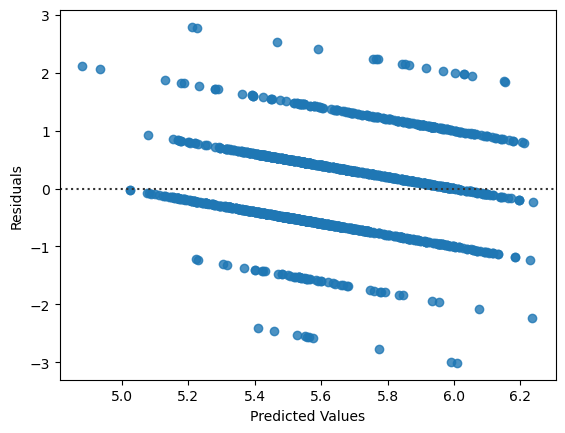

In [314]:
# Create the residual plot of model 1
sns.residplot(y_pred1, residuals1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

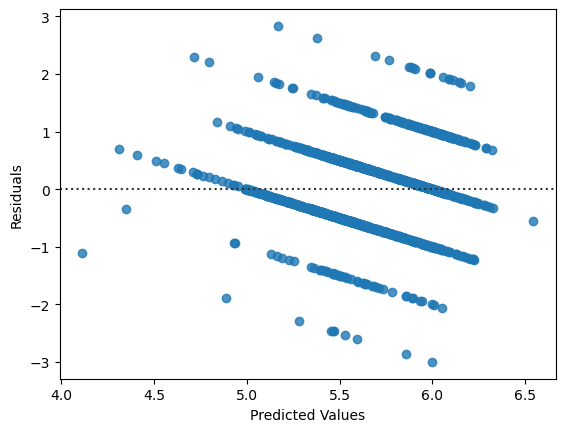

In [315]:
# Create the residual plot of model 2
sns.residplot(y_pred2, residuals2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Well done. You did great in solving all the exercises!